# Лабораторная работа №4
## Линейные модели, SVM и деревья решений

### Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
  - одну из линейных моделей (линейную или полиномиальную регрессию при - решении задачи регрессии, логистическую регрессию при решении задачи  классификации);
  - SVM;
  - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.


Ссылка на датасет: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [ ]:
!unzip "archive(4).zip"

Archive:  archive(4).zip
  inflating: diabetes.csv            


In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data = pd.DataFrame(df, columns=df.columns)

<Axes: >

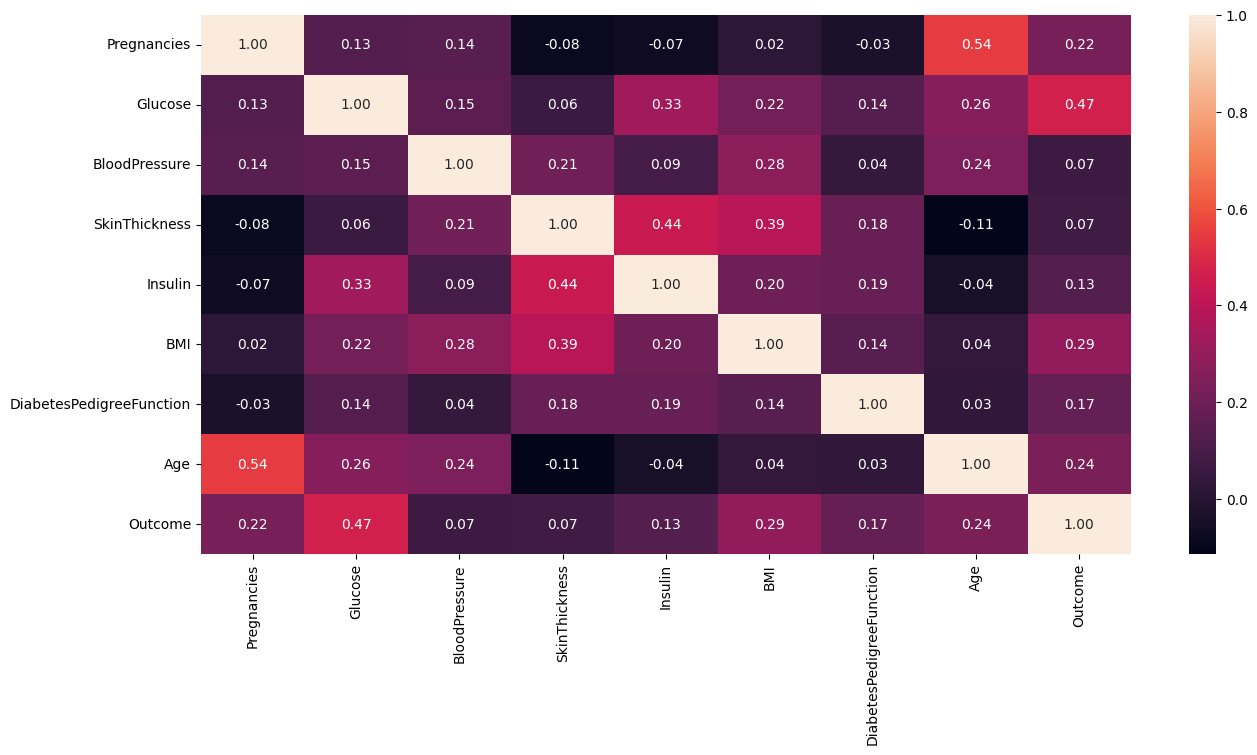

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

<Axes: xlabel='Glucose', ylabel='Outcome'>

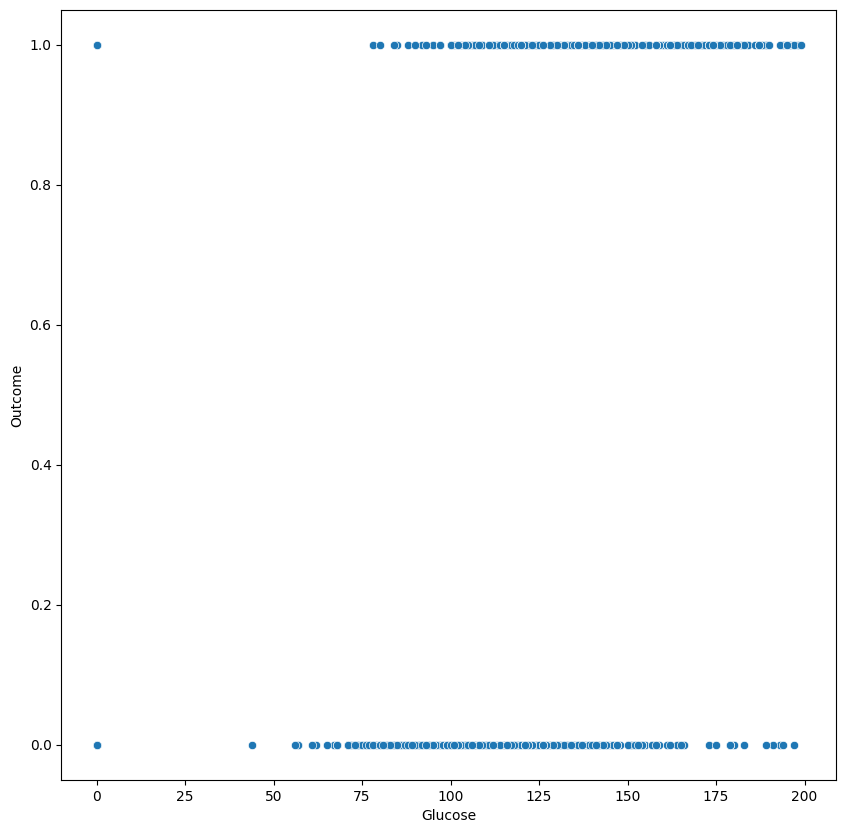

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Glucose', y='Outcome', data=dia_df)

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение моделей

### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## SVM

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

## Дерево решений

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Оценка качества моделей

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_tree = tree.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)

In [ ]:
print(f'Логистическая регрессия - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}')
print(f'SVM - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}')
print(f'Дерево решений - Accuracy: {accuracy_tree}, Precision: {precision_tree}, Recall: {recall_tree}')

Логистическая регрессия - Accuracy: 0.7467532467532467, Precision: 0.6379310344827587, Recall: 0.6727272727272727
SVM - Accuracy: 0.7662337662337663, Precision: 0.7209302325581395, Recall: 0.5636363636363636
Дерево решений - Accuracy: 0.7467532467532467, Precision: 0.625, Recall: 0.7272727272727273


In [ ]:
#Функция построения графика для вывода признаков, наиболее важных для определения целевого признака
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

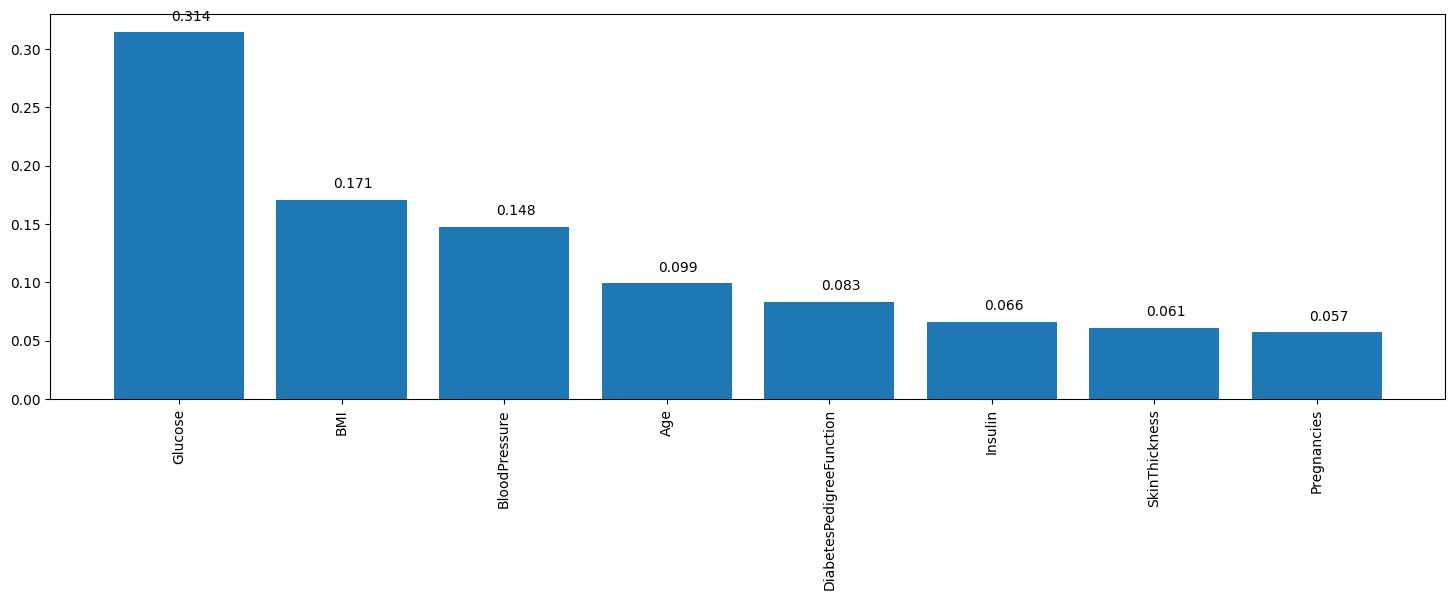

In [ ]:
diagram, _ = draw_feature_importances(tree, data)

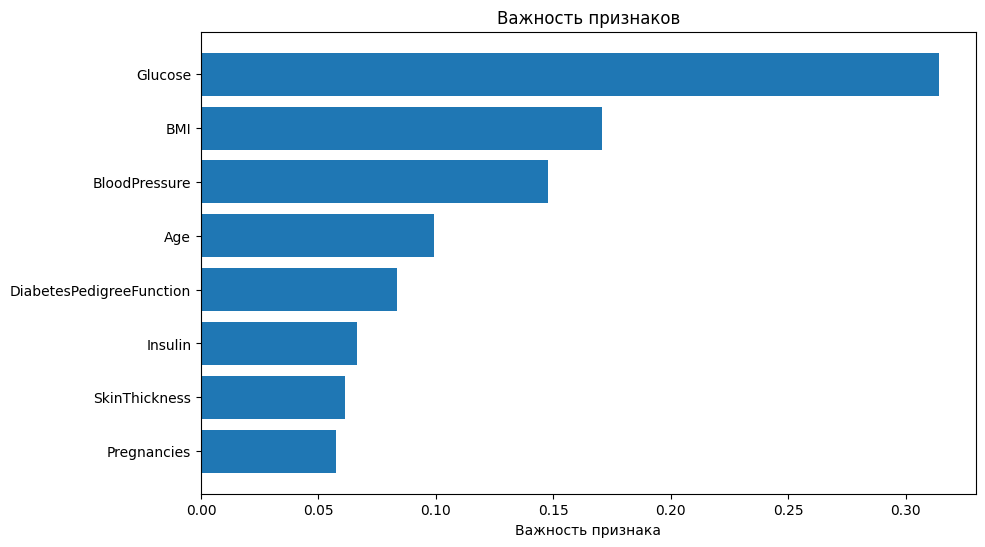

In [45]:
importances = tree.feature_importances_
features = X.columns
indices = np.argsort(importances)
val_features = features[:5]

plt.figure(figsize=(10, 6))
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Важность признака')
plt.show()

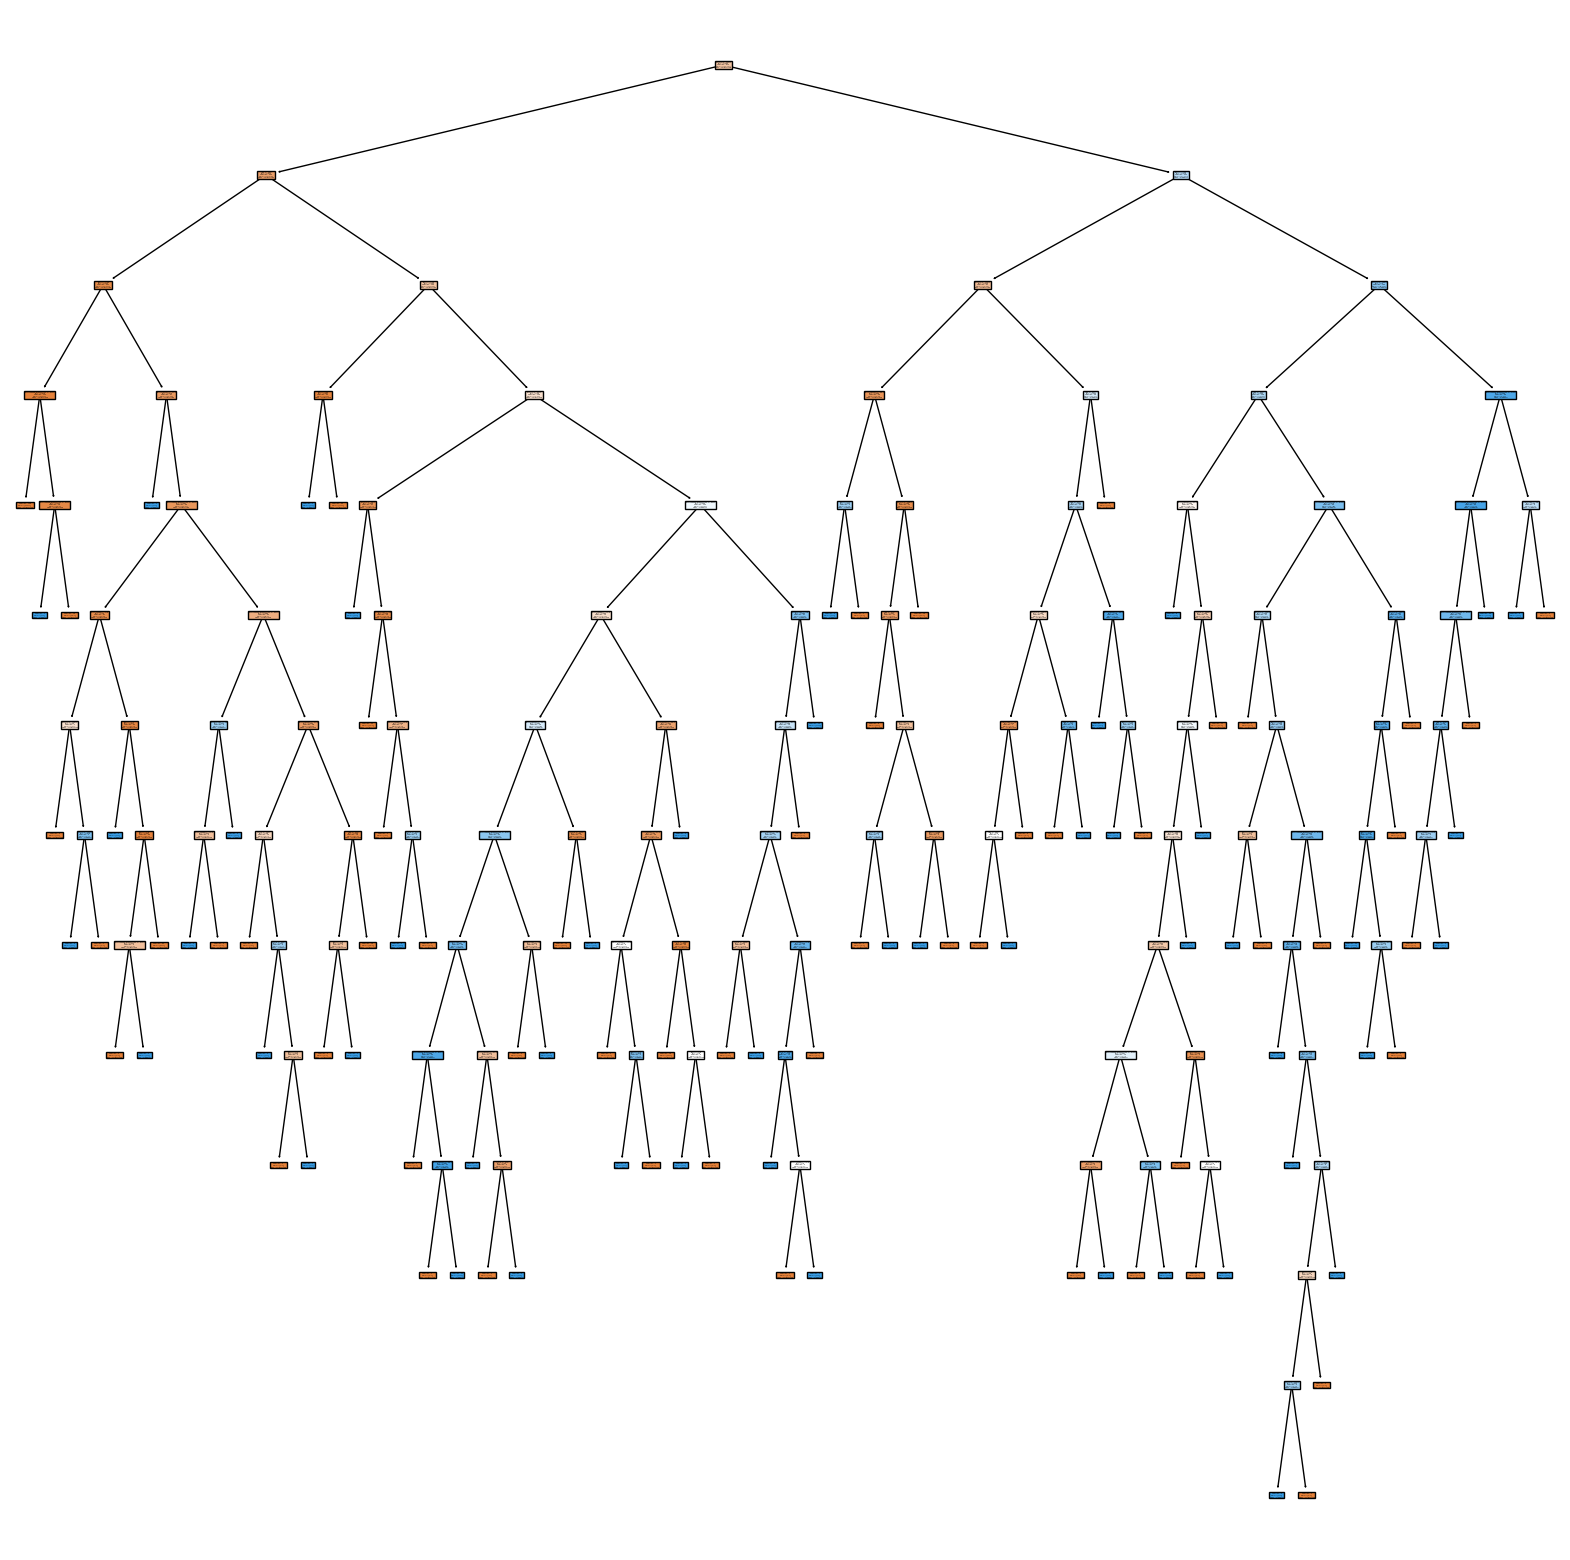

In [46]:
# Визуализация дерева решений
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=features, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()